# House Prices Prediction Project

**Linear Regression: Housing Prices Prediction**

* Importing Libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm #library for statistics analysis#
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.stats.anova import anova_lm
!pip install ISLP
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize,
poly)
from sklearn.impute import SimpleImputer

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 kB 22.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.1 MB/s eta 0:00:00
  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/MyDrive/BUS310/Group_Assignment/Group2_Assignment_1/Data/housing_price_full_sample.csv'

df = pd.read_csv(file_path)

num_observations = df.shape[0]
num_variables = df.shape[1]

print(f"Number of observations: {num_observations}")
print(f"Number of variables: {num_variables}")

df.head()

Mounted at /content/drive
Number of observations: 2919
Number of variables: 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Function:
# Regress Function
def regress(y, x):
  model = sm.OLS(y, x)
  results = model.fit()
  print(results.summary())
  return results

def add_data_label(plt, fnt_size):
    for p in plt.patches:
        height = p.get_height()
        plt.annotate(format(height, '.0f'),
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 12),
                     textcoords='offset points',
                     fontsize=fnt_size,
                     fontname='sans-serif', fontstyle='oblique') # or 'italic'

## **1. Data Organization**

**1.1 Missing Data and imputing missing data**

* Identify Missing Data

In [ ]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

print(f"Total number of columns with missing values: {len(missing_values)} \n")

# Make a copy of the original df
df_original = df.copy()

print(missing_values)


Total number of columns with missing values: 34 

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
dtype: int64


* Inputting Missing Data

In [ ]:
# Impute missing values
# Impute missing numerical values
num_cols = df.select_dtypes(include=['number']).columns
num_imputer = SimpleImputer(strategy='mean')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Impute missing categorical values
cat_cols = df.select_dtypes(exclude=['number']).columns
cat_cols_names = cat_cols.tolist()
print(f"{len(cat_cols_names)} Categorical columns: {cat_cols_names}")
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

# Verify that there are no more missing values
print("\nMissing values after imputation:\n", df.isnull().sum())

43 Categorical columns: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Missing values after imputation:
 Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


**1.2 Label encoding/factorizing the remaining character variables**

In [ ]:
cat_vars = cat_cols.tolist()

# Create dummy variables
df_dummies = pd.get_dummies(df[cat_cols], drop_first=True)
df_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
1,False,False,True,False,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,True,False
2,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,True,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False


**1.3 Changing some numeric variables into categorical variables**

* Number of Years of Data

In [ ]:
# Determine the range of years in the dataset
print("Number of unique years in the dataset:", df['YrSold'].nunique())

Number of unique years in the dataset: 5


* Convert year and month sold, year built, and MSSubClass from numeric variables into dummy variables.

In [ ]:
categorical_time_cols = ['MSSubClass','YrSold', 'MoSold', 'YearBuilt']
df_time_dummies = pd.get_dummies(df[categorical_time_cols], columns=categorical_time_cols, drop_first=True)
df_time_dummies.head()

,MSSubClass_30.0,MSSubClass_40.0,MSSubClass_45.0,MSSubClass_50.0,MSSubClass_60.0,MSSubClass_70.0,MSSubClass_75.0,MSSubClass_80.0,MSSubClass_85.0,MSSubClass_90.0,...,YearBuilt_2001.0,YearBuilt_2002.0,YearBuilt_2003.0,YearBuilt_2004.0,YearBuilt_2005.0,YearBuilt_2006.0,YearBuilt_2007.0,YearBuilt_2008.0,YearBuilt_2009.0,YearBuilt_2010.0
0,False,False,False,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Concat the final_df
df_final = pd.concat([df, df_dummies, df_time_dummies], axis=1)
df_final.head()

# Create a df that only contains numerical and dummies
df_final_num_dummies = df_final.drop(cat_cols, axis=1)
df_final_num_dummies = df_final_num_dummies.drop(categorical_time_cols, axis=1)

num_observations = df_final_num_dummies.shape[0]
num_variables = df_final_num_dummies.shape[1]

print(f"Number of observations: {num_observations}")
print(f"Number of variables: {num_variables}")

df_final_num_dummies.head()

Number of observations: 2919
Number of variables: 389


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,YearBuilt_2001.0,YearBuilt_2002.0,YearBuilt_2003.0,YearBuilt_2004.0,YearBuilt_2005.0,YearBuilt_2006.0,YearBuilt_2007.0,YearBuilt_2008.0,YearBuilt_2009.0,YearBuilt_2010.0
0,1.0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,...,False,False,True,False,False,False,False,False,False,False
1,2.0,80.0,9600.0,6.0,8.0,1976.0,0.0,978.0,0.0,284.0,...,False,False,False,False,False,False,False,False,False,False
2,3.0,68.0,11250.0,7.0,5.0,2002.0,162.0,486.0,0.0,434.0,...,True,False,False,False,False,False,False,False,False,False
3,4.0,60.0,9550.0,7.0,5.0,1970.0,0.0,216.0,0.0,540.0,...,False,False,False,False,False,False,False,False,False,False
4,5.0,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,...,False,False,False,False,False,False,False,False,False,False


## **2. Exploratory Data Analysis**

In [ ]:
# Check the basic descriptive statistics for SalePrice
saleprice_stats = df_final['SalePrice'].describe().round(2)
print(saleprice_stats)

count      2919.00
mean     180052.86
std       57381.56
min       34900.00
25%      154795.00
50%      176735.00
75%      191896.00
max      755000.00
Name: SalePrice, dtype: float64


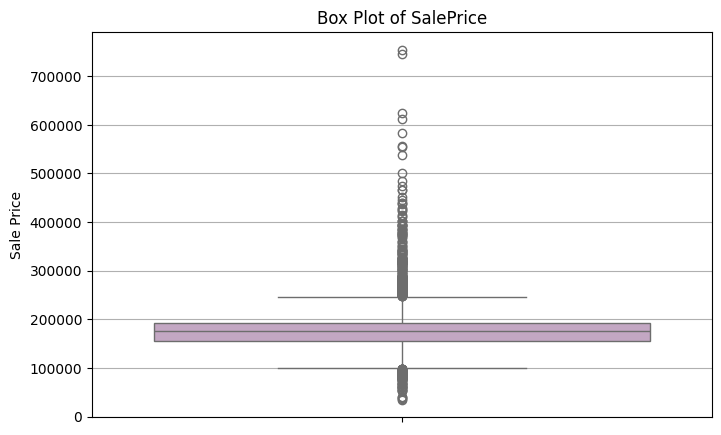

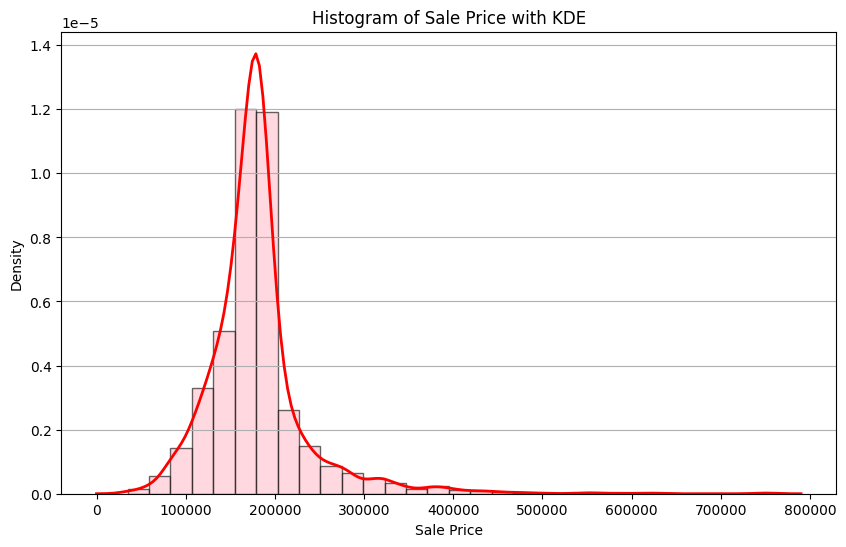

In [ ]:
# Create a box plot for SalePrice
plt.figure(figsize=(8, 5))
sns.boxplot(y=df_final['SalePrice'], color='#C8A2C8')
plt.title('Box Plot of SalePrice')
plt.ylabel('Sale Price')
plt.grid(axis='y')
plt.show()

# Create a histogram with KDE for SalePrice
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(df_final['SalePrice'], bins=30, color='pink', density=True, edgecolor='black', alpha=0.6)
# Add a smooth KDE line
kde = sns.kdeplot(df_final['SalePrice'], color='red', lw=2)
plt.title( 'Histogram of Sale Price with KDE')
plt. xlabel('Sale Price')
plt.ylabel ('Density')
plt.grid (axis='y')
plt.show()

**Numerical Predictors**

In [ ]:
# Check how many numerical variables exist in the dataset
num_vars = df_final_num_dummies.select_dtypes(include=['number']).columns
print(f'Total numerical variables: {len(num_vars)}')

Total numerical variables: 34


In [ ]:
 # Select only numeric columns
numeric_df = df_final_num_dummies.select_dtypes(include=['number'])

# Compute correlation between numerical variables and SalePrice
correlations = numeric_df.corr()['SalePrice'].drop('SalePrice').sort_values(ascending=False)
print("All correlation:")
print(correlations)

# Sort the correlation matrix and display the top 10 variables most correlated with SalePrice
top_10_corr = correlations.head(10)
print("\nTop 10 correlation:")
print(top_10_corr)

All correlation:
GrLivArea        0.588010
OverallQual      0.550911
TotRmsAbvGrd     0.469800
GarageCars       0.469249
GarageArea       0.464809
1stFlrSF         0.462865
TotalBsmtSF      0.453212
FullBath         0.433711
MasVnrArea       0.353953
Fireplaces       0.353567
YearRemodAdd     0.350032
GarageYrBlt      0.314918
LotFrontage      0.302018
LotArea          0.296496
BsmtFinSF1       0.272195
2ndFlrSF         0.272140
WoodDeckSF       0.238381
OpenPorchSF      0.236376
BedroomAbvGr     0.229611
HalfBath         0.228836
BsmtUnfSF        0.175191
BsmtFullBath     0.148126
ScreenPorch      0.082308
PoolArea         0.081039
3SsnPorch        0.029979
MiscVal         -0.000037
BsmtFinSF2      -0.007437
Id              -0.011630
BsmtHalfBath    -0.012616
LowQualFinSF    -0.015395
OverallCond     -0.065785
EnclosedPorch   -0.070698
KitchenAbvGr    -0.071760
Name: SalePrice, dtype: float64

Top 10 correlation:
GrLivArea       0.588010
OverallQual     0.550911
TotRmsAbvGrd    0.4698

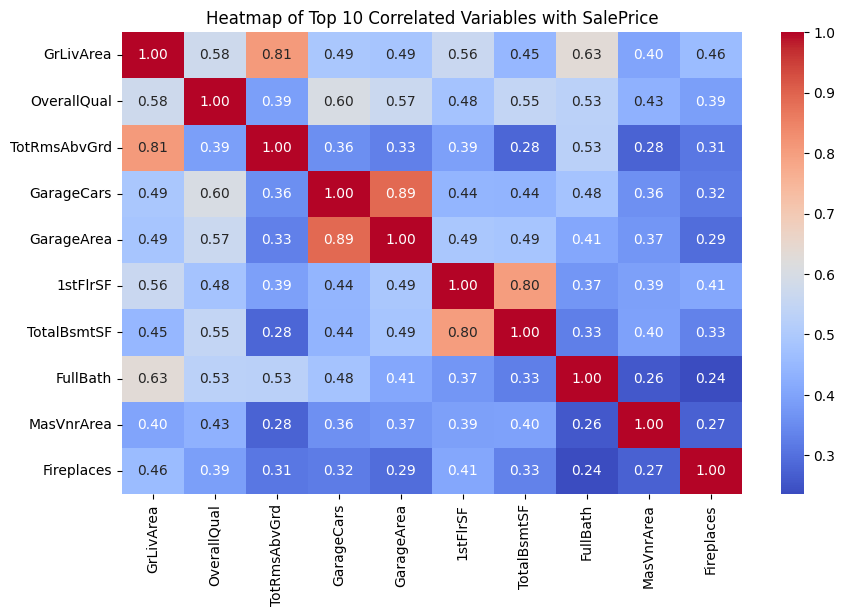

In [ ]:
# Make a heatmap illustrating the correlation pairs for the top 10 variables with SalePrice

plt.figure(figsize=(10, 6))
sns.heatmap(df_final_num_dummies[top_10_corr.index].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Top 10 Correlated Variables with SalePrice')
plt.show()

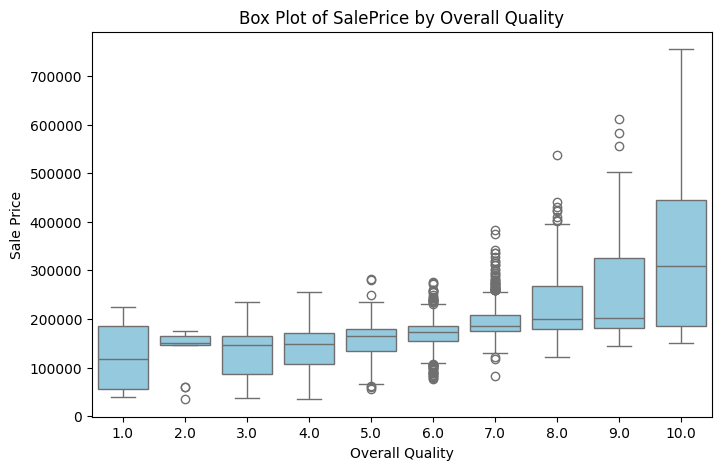

In [ ]:
# Create a box plot of SalePrice vs Overall Quality
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_final_num_dummies['OverallQual'], y=df_final_num_dummies['SalePrice'], color='skyblue')
plt.title('Box Plot of SalePrice by Overall Quality')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.show()

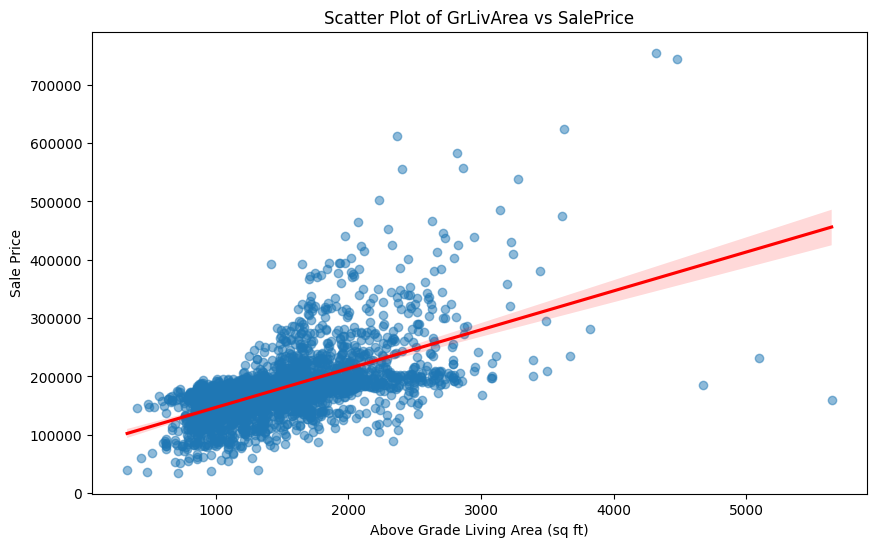

In [ ]:
# Create a scatter plot between GrLivArea and SalePrice with a linear fit line
plt.figure(figsize=(10, 6))
sns.regplot(x=df_final_num_dummies['GrLivArea'], y=df_final_num_dummies['SalePrice'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Scatter Plot of GrLivArea vs SalePrice')
plt.xlabel('Above Grade Living Area (sq ft)')
plt.ylabel('Sale Price')
plt.show()

**Categorical Predictors**

<ipython-input-18-7835630e1993>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot1 = sns.barplot(x='YrSold', y='SalePrice', data=average_sale_price, palette="Blues_d", ax=axes[0, 0])
<ipython-input-18-7835630e1993>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot2 = sns.barplot(x='YrSold', y='Count', data=sales_count, palette="Greens_d", ax=axes[0, 1])
<ipython-input-18-7835630e1993>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([int(float(label.get_text())) for label in ax.get_xticklabels()])
<ipython-input-18-7835630e1993>:29: UserWarning: set_ticklabels() should only be used with a fixed n

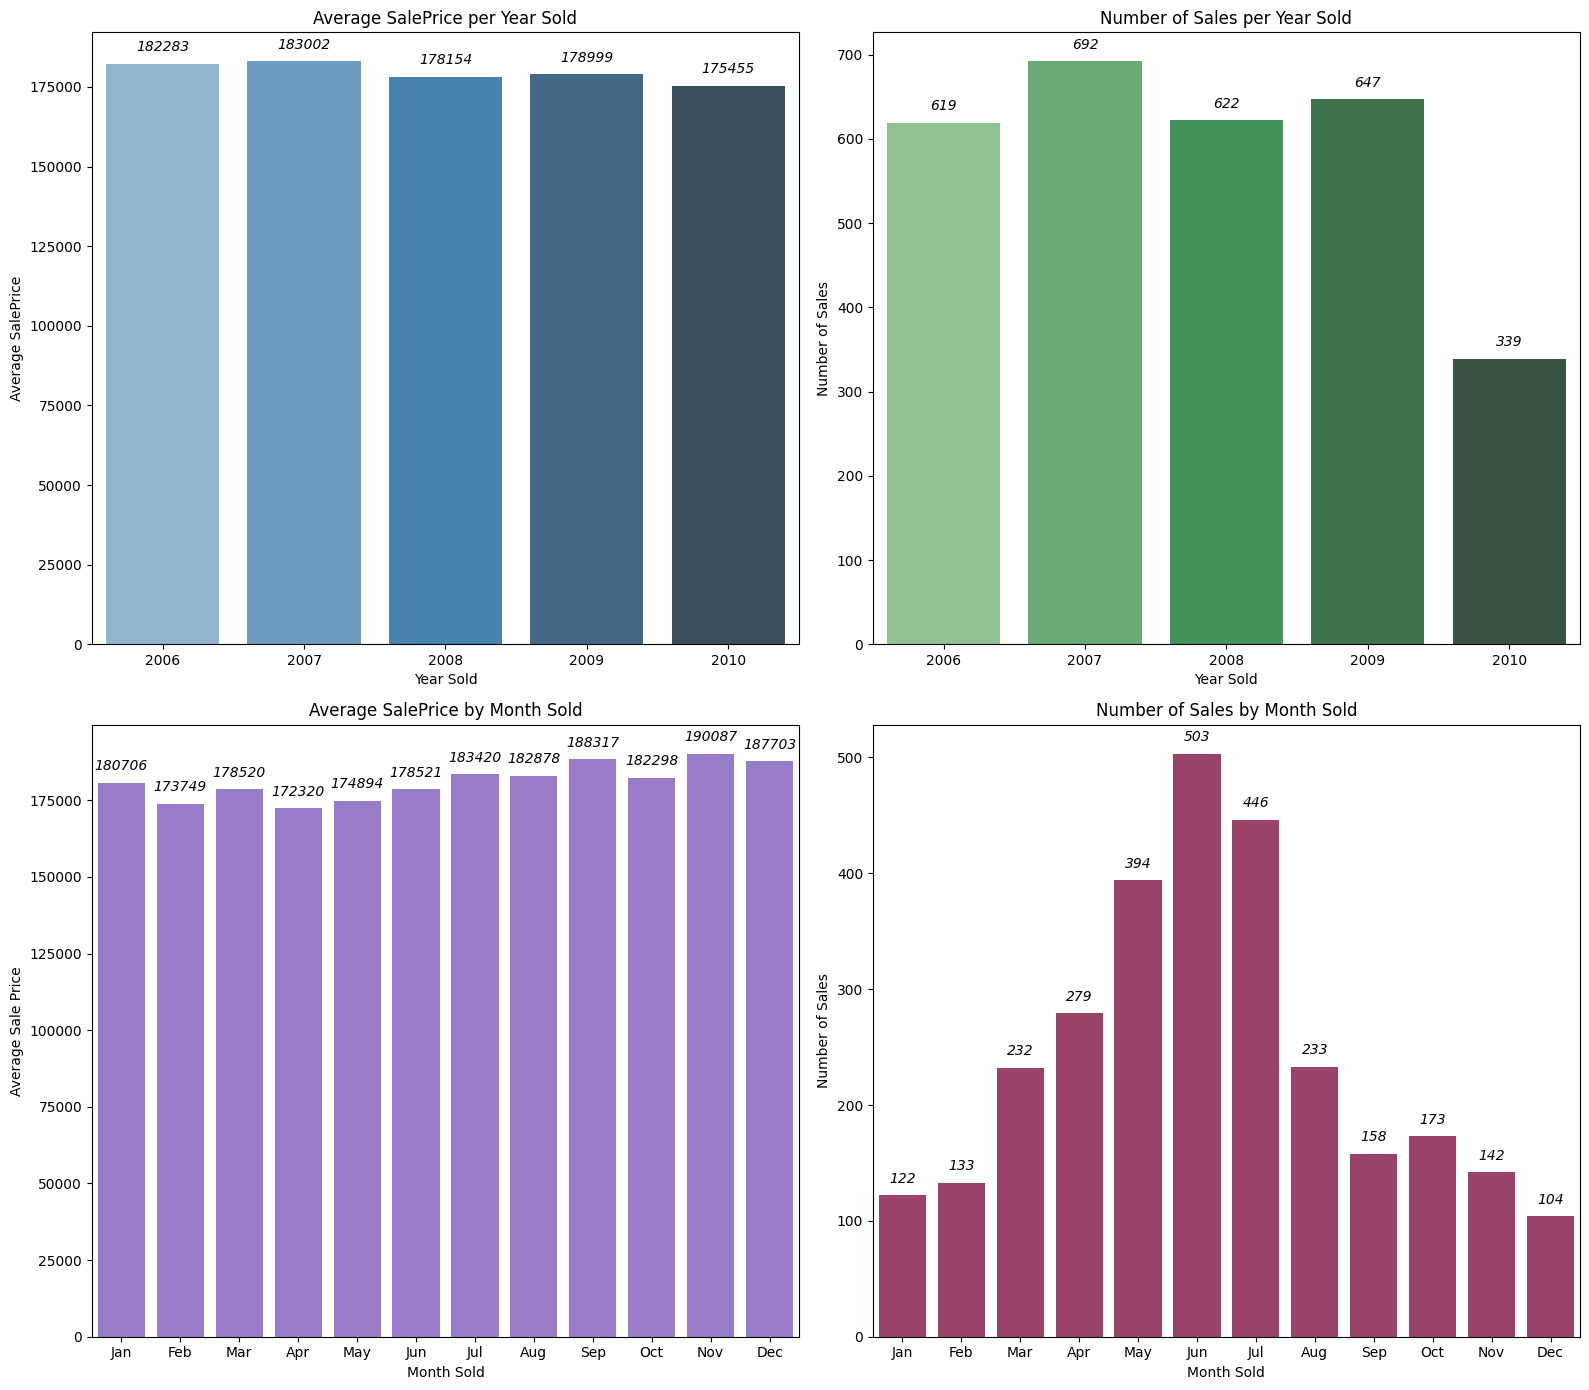

In [ ]:
# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14))  # Adjust figsize as needed

# 1. Average Sale Price per Year
average_sale_price = df_final.groupby('YrSold')['SalePrice'].mean().reset_index()
barplot1 = sns.barplot(x='YrSold', y='SalePrice', data=average_sale_price, palette="Blues_d", ax=axes[0, 0])
axes[0, 0].set_title('Average SalePrice per Year Sold')
axes[0, 0].set_xlabel('Year Sold')
axes[0, 0].set_ylabel('Average SalePrice')

# Add data labels to the first barplot
add_data_label(barplot1, 10)

# 2. Number of Sales per Year
sales_count = df_final['YrSold'].value_counts().reset_index()
sales_count.columns = ['YrSold', 'Count']
sales_count = sales_count.sort_values(by='YrSold')
barplot2 = sns.barplot(x='YrSold', y='Count', data=sales_count, palette="Greens_d", ax=axes[0, 1])
axes[0, 1].set_title('Number of Sales per Year Sold')
axes[0, 1].set_xlabel('Year Sold')
axes[0, 1].set_ylabel('Number of Sales')

# Add data labels to the second barplot
add_data_label(barplot2, 10)


# Customize x-axis tick labels for plots with 'YrSold'
for ax in [axes[0, 0], axes[0, 1]]:  # Select the subplots with 'YrSold'
    ax.set_xticklabels([int(float(label.get_text())) for label in ax.get_xticklabels()])


# 3. Average Sale Price per Month
barplot3 = sns.barplot(x=df_final['MoSold'], y=df_final['SalePrice'], estimator=np.mean, color="#966FD6", ax=axes[1, 0], ci=None) # Set ci=None here
axes[1, 0].set_title('Average SalePrice by Month Sold')
axes[1, 0].set_xlabel('Month Sold')
axes[1, 0].set_ylabel('Average Sale Price')

# Add data labels to the third barplot
add_data_label(barplot3, 10)


# 4. Number of Sales per Month
barplot4 = sns.countplot(x=df_final['MoSold'], color="#AA336A", ax=axes[1, 1])
axes[1, 1].set_title('Number of Sales by Month Sold')
axes[1, 1].set_xlabel('Month Sold')
axes[1, 1].set_ylabel('Number of Sales')

# Add data labels to the fourth barplot
add_data_label(barplot4, 10)

# Customize x-axis tick labels for plots with 'MoSold'
for ax in [axes[1, 0], axes[1, 1]]:  # Select the subplots with 'MoSold'
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun','Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<ipython-input-19-721feaa765b4>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels([label.get_text() for label in axes[0, 0].get_xticklabels()], rotation=90)
<ipython-input-19-721feaa765b4>:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 1].set_xticklabels([label.get_text() for label in axes[0, 1].get_xticklabels()], rotation=90)
<ipython-input-19-721feaa765b4>:35: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot3 = sns.barplot(x=df_final['MSSubClass'], y=df_final['SalePrice'], estimator=np.median, ci=None, ax=axes[1, 0], color='#FDFD96')


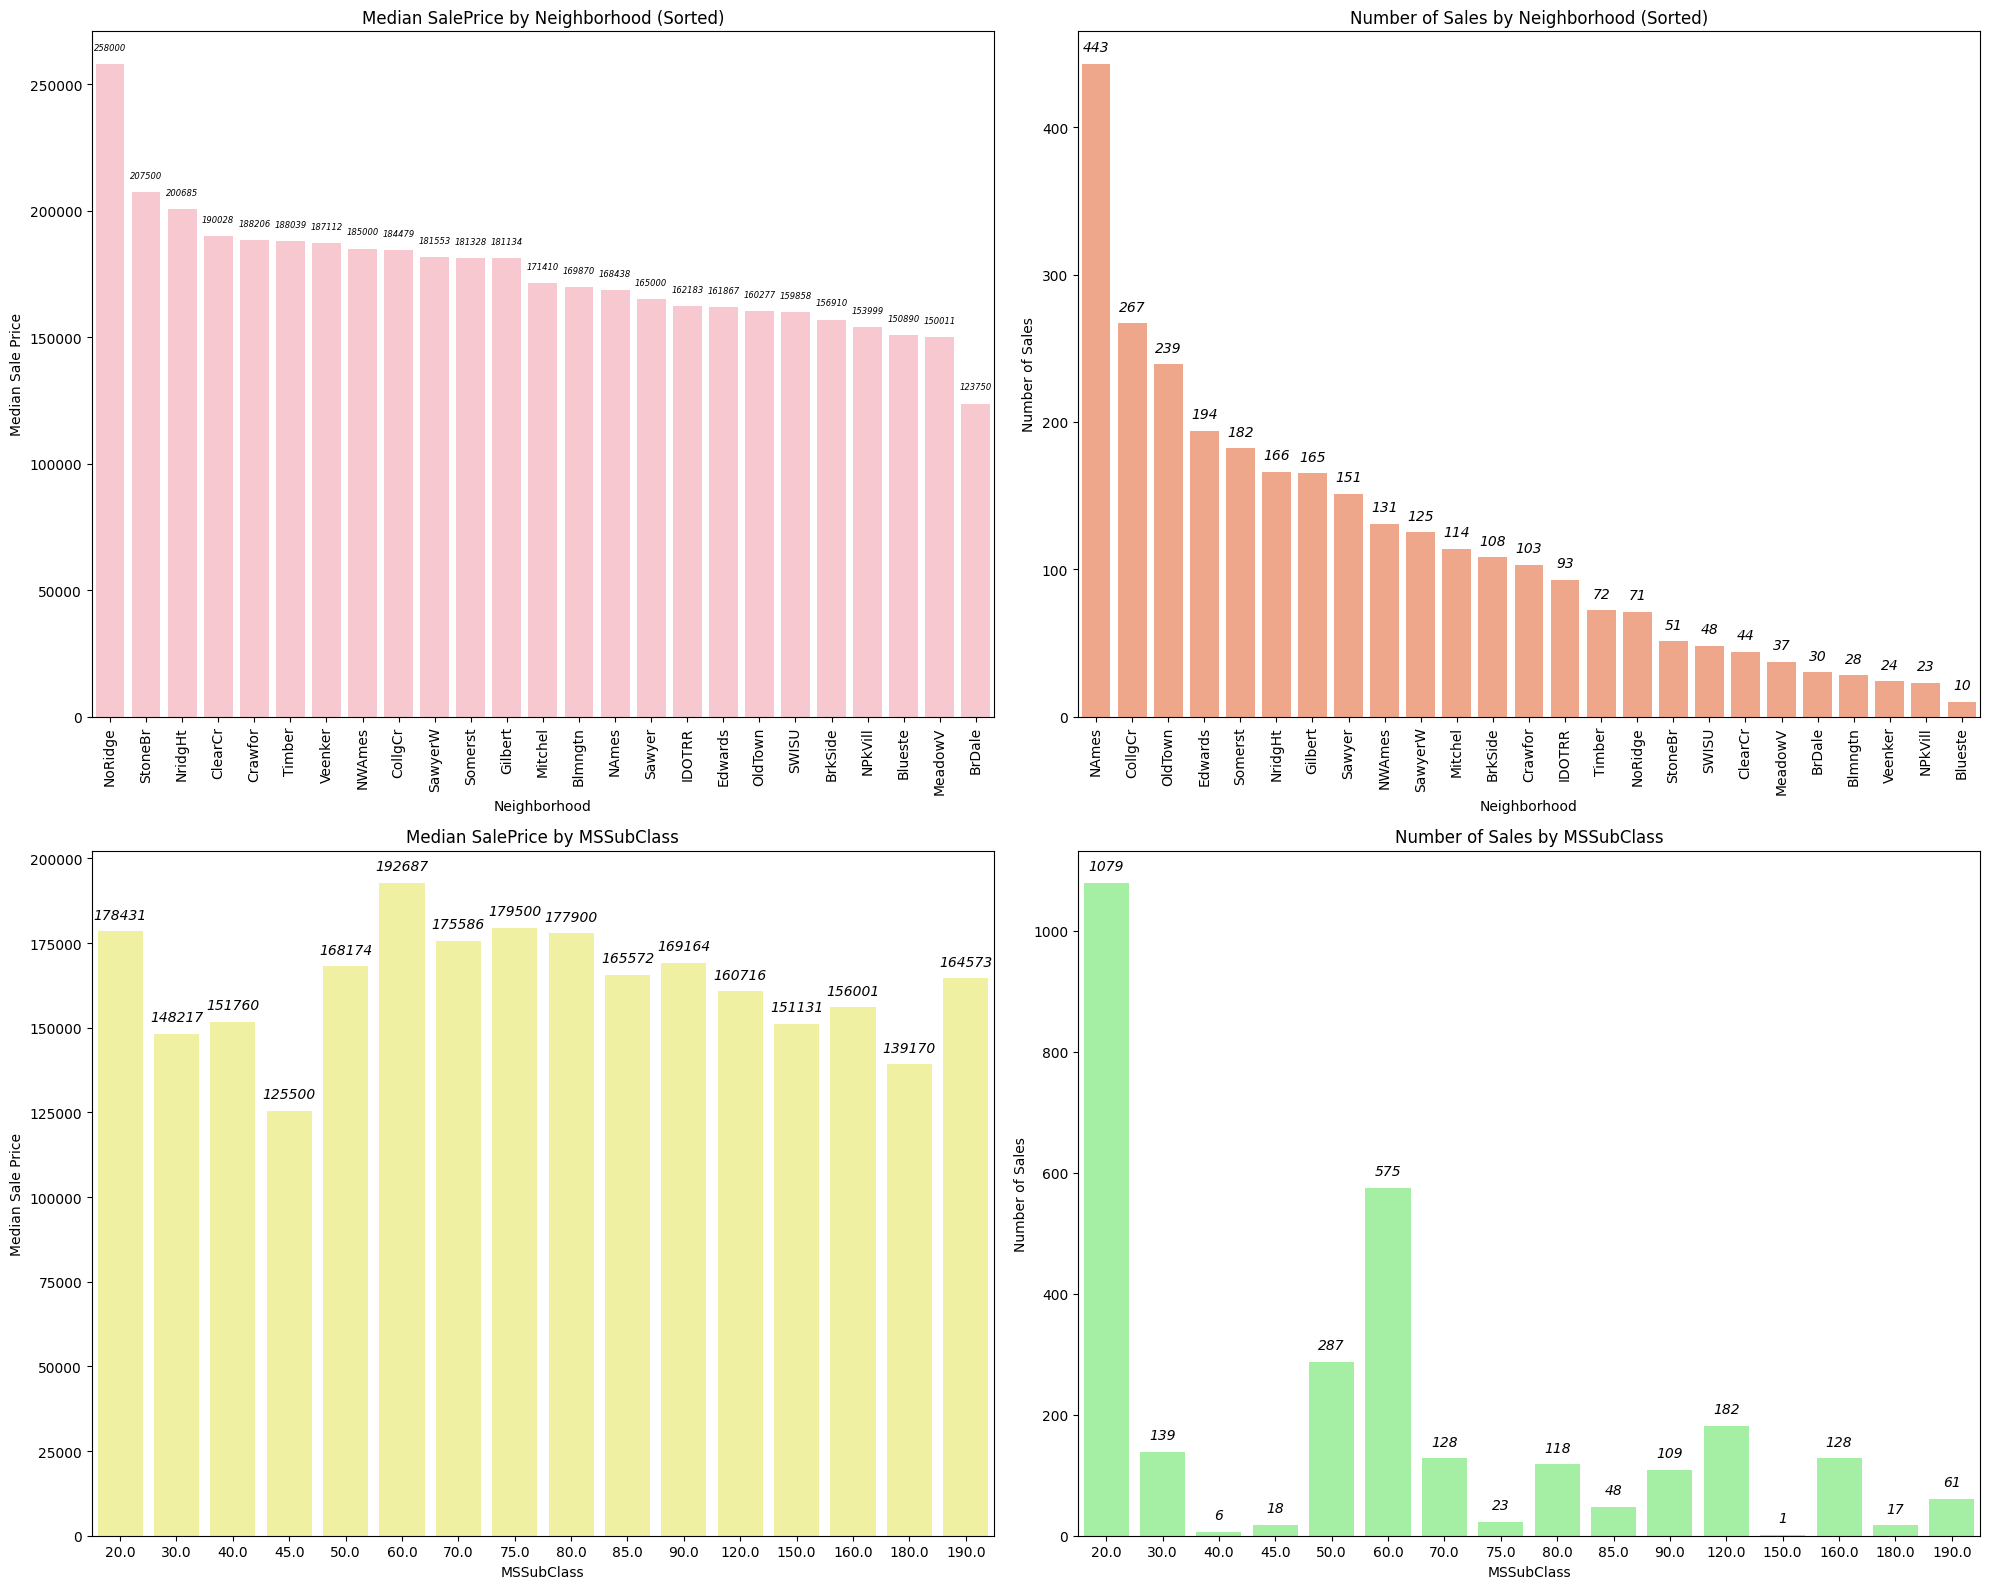

In [ ]:
# Create bar charts for median SalePrice and number of sales by Neighborhood

# Set up the 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 16))  # Adjust figsize as needed

# 1. Median SalePrice by Neighborhood
# Calculate median SalePrice for each neighborhood
neighborhood_median_price = df_final.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending=False)

# Create the bar plot using the sorted data
barplot1 = sns.barplot(x=neighborhood_median_price.index, y=neighborhood_median_price.values, ax=axes[0, 0], color='pink')
axes[0, 0].set_xticklabels([label.get_text() for label in axes[0, 0].get_xticklabels()], rotation=90)
axes[0, 0].set_title('Median SalePrice by Neighborhood (Sorted)')
axes[0, 0].set_xlabel('Neighborhood')
axes[0, 0].set_ylabel('Median Sale Price')

# Add data labels to the first barplot
add_data_label(barplot1, 6)

# 2. Number of Sales by Neighborhood (Sorted)
# Calculate and sort sales counts for each neighborhood
neighborhood_sales_count = df_final['Neighborhood'].value_counts().sort_values(ascending=False)

# Create the bar plot using the sorted data
barplot2 = sns.countplot(x='Neighborhood', data=df_final, order=neighborhood_sales_count.index, ax=axes[0, 1], color='lightsalmon')  # Corrected
axes[0, 1].set_xticklabels([label.get_text() for label in axes[0, 1].get_xticklabels()], rotation=90)
axes[0, 1].set_title('Number of Sales by Neighborhood (Sorted)')
axes[0, 1].set_xlabel('Neighborhood')
axes[0, 1].set_ylabel('Number of Sales')

# Add data labels to the second barplot
add_data_label(barplot2, 10)

# 3. Median SalePrice by MSSubClass
barplot3 = sns.barplot(x=df_final['MSSubClass'], y=df_final['SalePrice'], estimator=np.median, ci=None, ax=axes[1, 0], color='#FDFD96')
axes[1, 0].set_title('Median SalePrice by MSSubClass')
axes[1, 0].set_xlabel('MSSubClass')
axes[1, 0].set_ylabel('Median Sale Price')

# Add data labels to the third barplot
add_data_label(barplot3, 10)

# 4. Number of Sales by MSSubClass
barplot4 = sns.countplot(x=df_final['MSSubClass'], ax=axes[1, 1], color='palegreen')
axes[1, 1].set_title('Number of Sales by MSSubClass')
axes[1, 1].set_xlabel('MSSubClass')
axes[1, 1].set_ylabel('Number of Sales')

# Add data labels to the fourth barplot
add_data_label(barplot4, 10)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## **3. Regression Analysis**

**3.1 Model Selection**

* Regress SalePrice on the top 10 most correlated predictors

In [ ]:
top_10_predictors = top_10_corr.index.tolist()
print(top_10_predictors)

x_top_10_no_drop = MS(df_final_num_dummies[top_10_predictors]).fit_transform(df)
y_top_10_no_drop = df_final_num_dummies['SalePrice']
results_top_10_corr = regress(y_top_10_no_drop, x_top_10_no_drop)

['GrLivArea', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', '1stFlrSF', 'TotalBsmtSF', 'FullBath', 'MasVnrArea', 'Fireplaces']
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     229.3
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:18:19   Log-Likelihood:                -35278.
No. Observations:                2919   AIC:                         7.058e+04
Df Residuals:                    2908   BIC:                         7.064e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025  

* Drop Predictors

In [ ]:
dropped_predictors = ['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'FullBath']

print(dropped_predictors)

chosen_predictors = [col for col in top_10_predictors if col not in dropped_predictors]

chosen_predictors

['GarageCars', 'TotRmsAbvGrd', '1stFlrSF', 'FullBath']


['GrLivArea',
 'OverallQual',
 'GarageArea',
 'TotalBsmtSF',
 'MasVnrArea',
 'Fireplaces']

## Model 1
* Using chosen predictors

In [ ]:
x_top_10_significant = MS(df_final_num_dummies[chosen_predictors]).fit_transform(df_final_num_dummies)
y_top_10_significant = df_final_num_dummies['SalePrice']
results_model_1 = regress(y_top_10_significant, x_top_10_significant)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.437
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     377.4
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:18:23   Log-Likelihood:                -35287.
No. Observations:                2919   AIC:                         7.059e+04
Df Residuals:                    2912   BIC:                         7.063e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    4.007e+04   3874.589     10.342      

* Regress Sales Price on All the Predictors in the dataset

In [ ]:
all_var = df_final_num_dummies.columns.drop('SalePrice')
print(f"Number of variables the all variables model: {len(all_var)}")

X_all = MS(all_var).fit_transform(df_final_num_dummies)
y_all = df_final_num_dummies['SalePrice']

results_all_predictors = regress(y_all, X_all)

Number of variables the all variables model: 388
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     9.361
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          6.49e-287
Time:                        17:28:14   Log-Likelihood:                -34835.
No. Observations:                2919   AIC:                         7.044e+04
Df Residuals:                    2533   BIC:                         7.275e+04
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

## Model 2
* Drop Insignificant Predictors

In [ ]:
significant_predictors = results_all_predictors.pvalues[results_all_predictors.pvalues < 0.05].index.tolist()
print(f"Number of Variables in Model 2: {len(significant_predictors)} \n")
print(f"Number of dropped variables from the all predictors model: {len(all_var) - len(significant_predictors)}")

df_significant = df_final_num_dummies[significant_predictors]
X_all_significant = MS(df_significant).fit_transform(df_significant)
y_all_significant = df_final_num_dummies['SalePrice']
results_all_significant = regress(y_all_significant, X_all_significant)

Number of Variables in Model 2: 38 

Number of dropped variables from the all predictors model: 350
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     79.63
Date:                Sun, 09 Mar 2025   Prob (F-statistic):               0.00
Time:                        17:18:29   Log-Likelihood:                -35078.
No. Observations:                2919   AIC:                         7.023e+04
Df Residuals:                    2880   BIC:                         7.047e+04
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

In [ ]:
ROUND = 4

# Assuming results_model_1 and results_all_significant are your model results
# Replace with your actual model results objects

# Extract relevant information from model 1
r_squared_model1 = round(results_model_1.rsquared, ROUND)
r_squared_adj_model1 = round(results_model_1.rsquared_adj, ROUND)
f_stat_model1 = round(results_model_1.fvalue, ROUND)
num_obs_model1 = results_model_1.nobs
num_vars_model1 = len(results_model_1.params) - 1

# Extract relevant information from model 2
r_squared_model2 = round(results_all_significant.rsquared, ROUND)
r_squared_adj_model2 = round(results_all_significant.rsquared_adj, ROUND)
f_stat_model2 = round(results_all_significant.fvalue, ROUND)
num_obs_model2 = int(results_all_significant.nobs)
num_vars_model2 = int(len(results_all_significant.params) - 1)


data = {'Metric': ['R-squared', 'Adjusted R_squared', 'F-Statistic', 'Number of Observations', 'Number of Variables'],
        'Model 1': [r_squared_model1, r_squared_adj_model1, f_stat_model1, num_obs_model1, num_vars_model1],
        'Model 2': [r_squared_model2, r_squared_adj_model2, f_stat_model2, num_obs_model2, num_vars_model2]}

df_comparison = pd.DataFrame(data)
df_comparison


,Metric,Model 1,Model 2
0,R-squared,0.4375,0.5124
1,Adjusted R_squared,0.4363,0.5059
2,F-Statistic,377.4420,79.6285
3,Number of Observations,2919.0000,2919.0000
4,Number of Variables,6.0000,38.0000


In [ ]:
# --- Coefficient Table ---
# Get coefficients from Model 1 and round to 4 decimal places
model1_coeffs = results_model_1.params.to_frame('Model 1 Coeff').round(ROUND)
model2_coeffs = results_all_predictors.params[model1_coeffs.index].to_frame('Model 2 Coeff').round(ROUND)

# --- P-value Table ---
model1_pvalues = results_model_1.pvalues.to_frame('Model 1 p-value').round(4)
model2_pvalues = results_all_predictors.pvalues[model1_pvalues.index].to_frame('Model 2 p-value').round(4)

# Concatenate the p-value DataFrames
comparison_table = pd.concat([model1_coeffs, model2_coeffs,model1_pvalues, model2_pvalues], axis=1)

# Display the p-value table
print("Comparison Table:")
print(comparison_table)

Comparison Table:
             Model 1 Coeff  Model 2 Coeff  Model 1 p-value  Model 2 p-value
intercept       40070.1783    -48353.0334           0.0000           0.8221
GrLivArea          38.0453        15.0546           0.0000           0.0149
OverallQual      8347.7096      1815.7719           0.0000           0.1487
GarageArea         28.3388        10.4309           0.0000           0.2703
TotalBsmtSF        14.5625        11.7757           0.0000           0.0032
MasVnrArea         11.4135         2.4244           0.0274           0.6828
Fireplaces       3637.8625      1034.2622           0.0105           0.5834


**3.2 Model Prediction**

Model 1:
Mean Squared Error: 1975065311.1005542
R-squared: 0.47026554519899966
        Actual      Predicted
2437  180097.0  142225.627139
2470  192687.0  201906.757717
2359  158152.0  137965.972267
789   187500.0  194561.430810
1642  172024.0  214973.627431
...        ...            ...
2880  209450.0  173555.539263
2295  195159.0  235758.639664
2222  211492.0  227276.486528
1090   92900.0  117024.069193
542   213250.0  205810.725119

[584 rows x 2 columns]


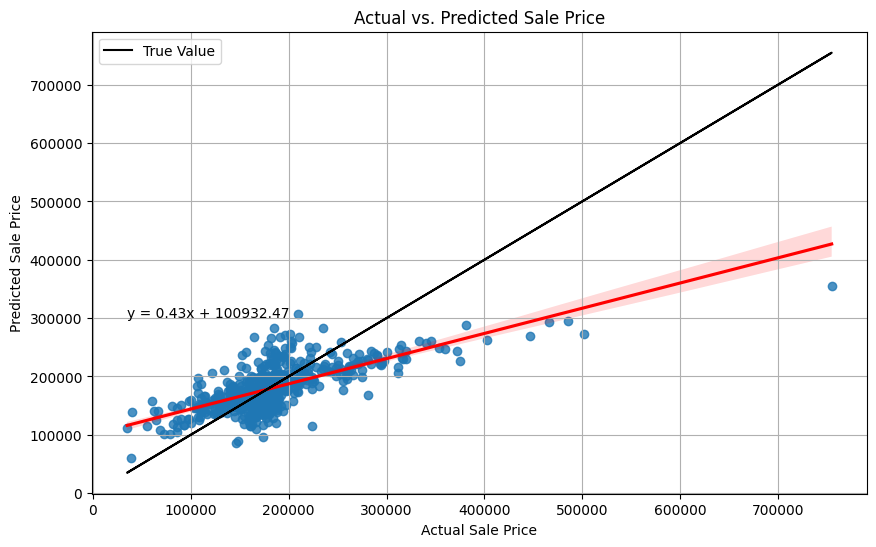


Model 2:
Mean Squared Error: 2032248901.8072393
R-squared: 0.45492827099529765
        Actual      Predicted
2437  180097.0  151847.010467
2470  192687.0  208260.354285
2359  158152.0  135388.965679
789   187500.0  214467.976814
1642  172024.0  190044.486060
...        ...            ...
2880  209450.0  180880.319409
2295  195159.0  220334.285455
2222  211492.0  235100.185816
1090   92900.0  103448.475735
542   213250.0  197078.017133

[584 rows x 2 columns]


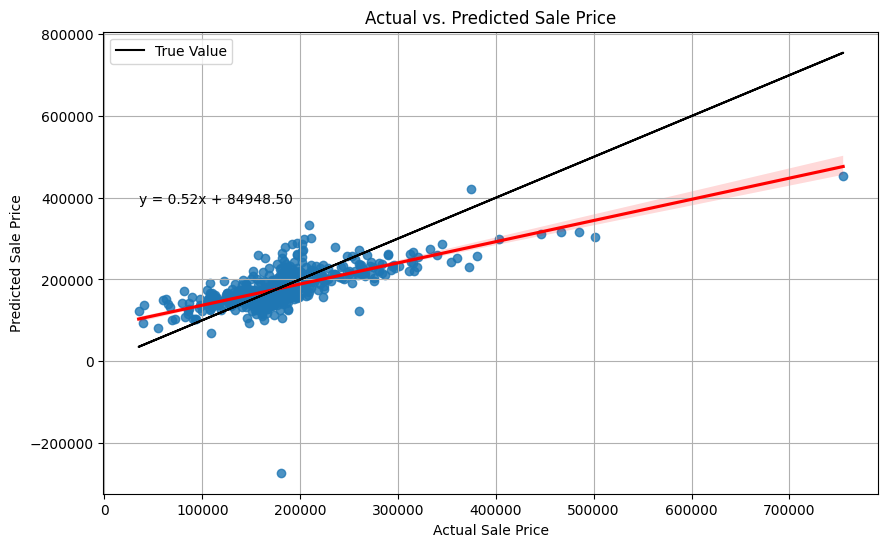

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

def train_model(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  # Fit the Linear Regression Model
  lr_model_high_corr = LinearRegression()
  lr_model_high_corr.fit(X_train, y_train)

  # Make predictions on the test set
  y_pred = lr_model_high_corr.predict(X_test)

  mse = mean_squared_error(y_test, y_pred)
  print(f"Mean Squared Error: {mse}")

  r2 = r2_score(y_test, y_pred)
  print(f"R-squared: {r2}")


  # Display the prediction
  predictions_df_high_corr = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
  print(predictions_df_high_corr)

  # Plot
  plt.figure(figsize=(10, 6))
  sns.regplot(x='Actual', y='Predicted', data=predictions_df_high_corr, ci=95, line_kws={'color': 'red'})
  plt.xlabel('Actual Sale Price')
  plt.ylabel('Predicted Sale Price')
  plt.title('Actual vs. Predicted Sale Price')
  # Add a y=x line (True Value)
  plt.plot(y_test, y_test, color='black', label='True Value')
  # --- Get Regression Line Equation ---
  slope, intercept, r_value, p_value, std_err = stats.linregress(predictions_df_high_corr['Actual'], predictions_df_high_corr['Predicted'])
  line_eq = f"y = {slope:.2f}x + {intercept:.2f}"  # Format equation string
  plt.text(min(y_test), max(y_pred) * 0.85, line_eq, color='black')
  plt.legend()
  plt.grid(True)
  plt.show()

print("Model 1:")
train_model(x_top_10_significant, y_top_10_significant)

print("\nModel 2:")
train_model(X_all_significant, y_all_significant)

# Creative Chart

After running 2 model, it seems that GrLivArea and TotalBsmntSF is one of the most important factor affecting the House Price

In [ ]:
# Regress Sale Price on GrLivArea
X_GrLivArea = MS(['GrLivArea']).fit_transform(df_final_num_dummies)
y = df_final_num_dummies['SalePrice']
results_GrLivArea = regress(y, X_GrLivArea)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.346
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     1542.
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          4.53e-271
Time:                        17:18:42   Log-Likelihood:                -35507.
No. Observations:                2919   AIC:                         7.102e+04
Df Residuals:                    2917   BIC:                         7.103e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.999e+04   2689.476     29.742      0.0

In [ ]:
# Regress SalePrice on TotalBsmtSF

# Create a Series with non-missing and non-zero TotalBsmtSF values
totBsmt = df_final_num_dummies['TotalBsmtSF'].dropna()  # Drop missing values
totBsmt = totBsmt[totBsmt != 0]  # Drop zero values

# Filter SalePrice corresponding to the filtered TotalBsmtSF values
salePrice = df_final_num_dummies.loc[totBsmt.index, 'SalePrice']

X_totBsmt = MS(['TotalBsmtSF']).fit_transform(df_final_num_dummies.loc[totBsmt.index]) # Create design matrix
y = df_final_num_dummies.loc[totBsmt.index, 'SalePrice'] # Create target vector
results_totBsmt = regress(salePrice, X_totBsmt) # Perform regression

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     753.6
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          2.42e-147
Time:                        17:18:45   Log-Likelihood:                -34825.
No. Observations:                2841   AIC:                         6.965e+04
Df Residuals:                    2839   BIC:                         6.967e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept    1.118e+05   2695.810     41.468      

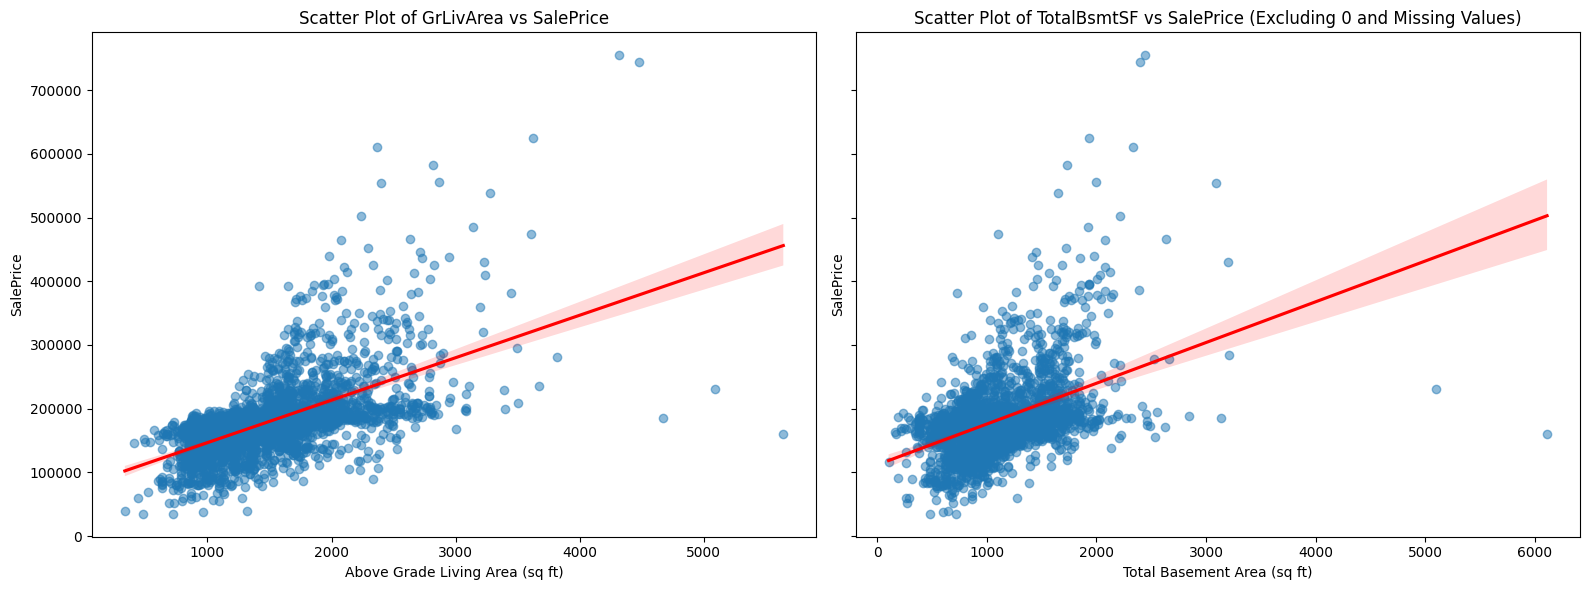

In [ ]:
# Scatterplot to compare SalePrice vs GrLivArea and SalePrice vs TotalBsmtSF

# Create a figure with two subplots (1 row, 2 columns), sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- Scatter plot for SalePrice vs GrLivArea ---
sns.regplot(x=df_final_num_dummies['GrLivArea'], y=df_final_num_dummies['SalePrice'],
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[0])
axes[0].set_title('Scatter Plot of GrLivArea vs SalePrice')
axes[0].set_xlabel('Above Grade Living Area (sq ft)')
# axes[0].set_ylabel('Sale Price')  # Remove y-label from the first subplot

# --- Scatter plot for SalePrice vs TotalBsmtSF (Excluding 0 and Missing Values) ---
# Create a Series with non-missing and non-zero TotalBsmtSF values
totBsmt = df_final_num_dummies['TotalBsmtSF'].dropna()  # Drop missing values
totBsmt = totBsmt[totBsmt != 0]  # Drop zero values

# Filter SalePrice corresponding to the filtered TotalBsmtSF values
salePrice = df_final_num_dummies.loc[totBsmt.index, 'SalePrice']

# ... (Perform regression if needed, as in your original code) ...

sns.regplot(x=totBsmt, y=salePrice,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'}, ax=axes[1])
axes[1].set_title('Scatter Plot of TotalBsmtSF vs SalePrice (Excluding 0 and Missing Values)')
axes[1].set_xlabel('Total Basement Area (sq ft)')
# axes[1].set_ylabel('Sale Price')  # Remove y-label from the second subplot

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Regress SalePrice on both GrLivArea and TotalBsmntSF

# Create a copy of df_final_num_dummies
df_reg = df_final_num_dummies.copy()

# Now, work with df_reg for handling infinite and missing values
# Check for infinite values in 'TotalBsmtSF' and 'GrLivArea'
print(df_reg[['TotalBsmtSF', 'GrLivArea']].isin([np.inf, -np.inf]).sum())

# If there are infinite values, handle them:
# Replace infinite values with a large number
df_reg.replace([np.inf, -np.inf], 1e9, inplace=True)

# OR remove rows with infinite values
df_reg = df_reg[~df_reg[['TotalBsmtSF', 'GrLivArea']].isin([np.inf, -np.inf]).any(axis=1)]

# Check for missing values in 'TotalBsmtSF' and 'GrLivArea'
print(df_reg[['TotalBsmtSF', 'GrLivArea']].isnull().sum())

# If there are missing values, handle them:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
df_reg[['TotalBsmtSF', 'GrLivArea']] = imputer.fit_transform(df_reg[['TotalBsmtSF', 'GrLivArea']])

# OR impute missing values with the median
# imputer = SimpleImputer(strategy='median')
# df_reg[['TotalBsmtSF', 'GrLivArea']] = imputer.fit_transform(df_reg[['TotalBsmtSF', 'GrLivArea']])

# Now, perform the regression using the modified df_reg
X_totBsmt_GrLivArea = MS(['TotalBsmtSF', 'GrLivArea']).fit_transform(df_reg)
y = df_reg['SalePrice']
results_totBsmt_GrLivArea = regress(y, X_totBsmt_GrLivArea)

TotalBsmtSF    0
GrLivArea      0
dtype: int64
TotalBsmtSF    0
GrLivArea      0
dtype: int64
                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.391
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     937.9
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          3.06e-315
Time:                        17:18:52   Log-Likelihood:                -35401.
No. Observations:                2919   AIC:                         7.081e+04
Df Residuals:                    2916   BIC:                         7.083e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Compare the R squared of different model

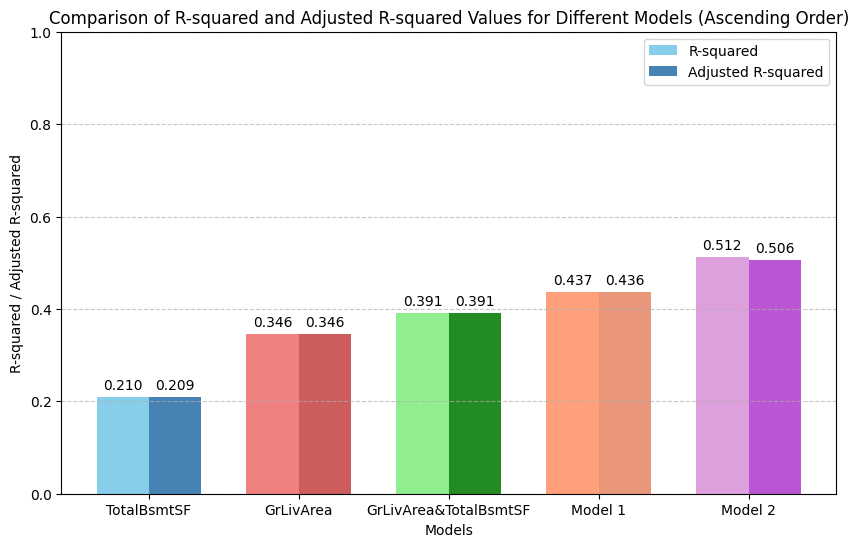

In [ ]:
# Assuming you have the R-squared and adjusted R-squared values from your models stored in variables:
r2_GrLivArea = results_GrLivArea.rsquared
r2_TotalBsmtSF = results_totBsmt.rsquared
r2_both = results_totBsmt_GrLivArea.rsquared
r2_model1 = results_model_1.rsquared
r2_model2 = results_all_significant.rsquared

adj_r2_GrLivArea = results_GrLivArea.rsquared_adj
adj_r2_TotalBsmtSF = results_totBsmt.rsquared_adj
adj_r2_both = results_totBsmt_GrLivArea.rsquared_adj
adj_r2_model1 = results_model_1.rsquared_adj
adj_r2_model2 = results_all_significant.rsquared_adj

# Create lists of model names and their corresponding R-squared and adjusted R-squared values
models = ['Model 1', 'Model 2', 'GrLivArea', 'TotalBsmtSF', 'GrLivArea&TotalBsmtSF']
r2_values = [r2_model1, r2_model2, r2_GrLivArea, r2_TotalBsmtSF, r2_both]
adj_r2_values = [adj_r2_model1, adj_r2_model2, adj_r2_GrLivArea, adj_r2_TotalBsmtSF, adj_r2_both]

# Sort models and r2_values in ascending order based on r2_values
sorted_indices = np.argsort(r2_values)  # Get indices that would sort r2_values
models_sorted = [models[i] for i in sorted_indices]
r2_values_sorted = [r2_values[i] for i in sorted_indices]
adj_r2_values_sorted = [adj_r2_values[i] for i in sorted_indices]  # Sort adjusted R-squared values accordingly


# Create the bar chart using sorted data
plt.figure(figsize=(10, 6))
bar_width = 0.35  # Width of each bar
x_pos = np.arange(len(models_sorted))  # X positions for the bars

# Create bars for R-squared and adjusted R-squared side-by-side
plt.bar(x_pos, r2_values_sorted, bar_width, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'plum'], label='R-squared')
plt.bar(x_pos + bar_width, adj_r2_values_sorted, bar_width, color=['steelblue', 'indianred', 'forestgreen', 'darksalmon', 'mediumorchid'], label='Adjusted R-squared')

plt.xlabel('Models')
plt.ylabel('R-squared / Adjusted R-squared')
plt.title('Comparison of R-squared and Adjusted R-squared Values for Different Models (Ascending Order)')
plt.xticks(x_pos + bar_width / 2, models_sorted)  # Set x-axis tick positions and labels
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()  # Display legend

# Add data labels on top of each bar
for i, v in enumerate(r2_values_sorted):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)  # R-squared labels
for i, v in enumerate(adj_r2_values_sorted):
    plt.text(i + bar_width, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=10)  # Adjusted R-squared labels

plt.show()

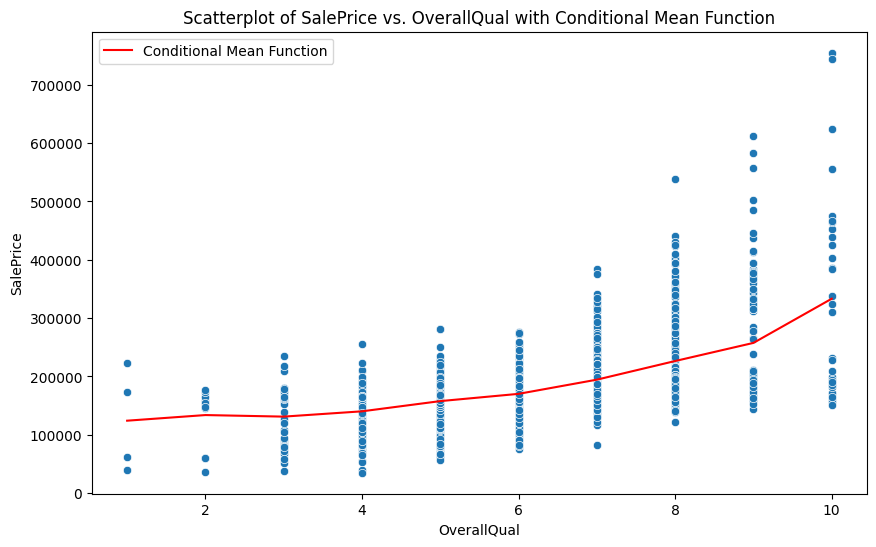

In [ ]:
# prompt: create a scatterplot of sale price and overallQual and add the Conditional Mean Function as a red line that connects the mean of each sale price in each overallQual together

# Assuming 'df_final_num_dummies' is your DataFrame
# and it contains 'SalePrice' and 'OverallQual' columns

# Calculate the conditional mean of SalePrice for each OverallQual
conditional_means = df_final_num_dummies.groupby('OverallQual')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallQual', y='SalePrice', data=df_final_num_dummies)
plt.plot(conditional_means.index, conditional_means.values, color='red', label='Conditional Mean Function')

plt.title('Scatterplot of SalePrice vs. OverallQual with Conditional Mean Function')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


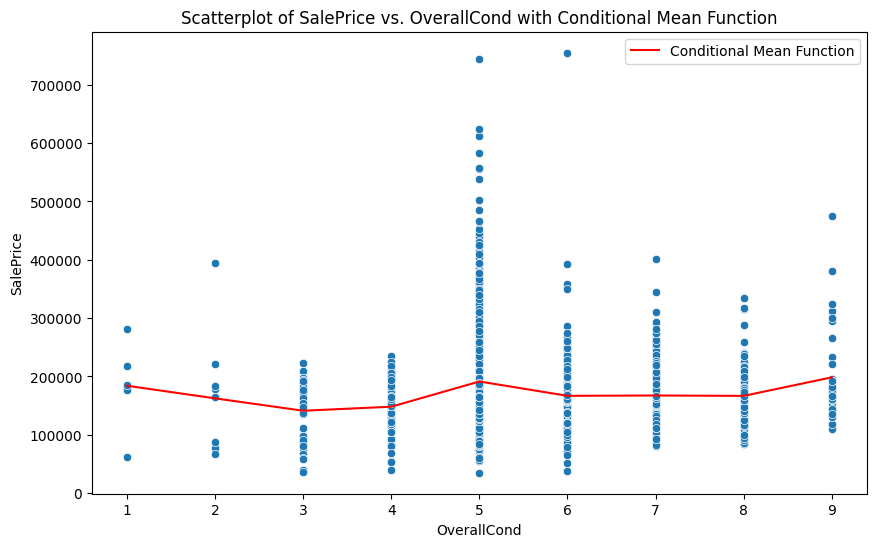

In [ ]:
# prompt: create a scatterplot of sale price and overallQual and add the Conditional Mean Function as a red line that connects the mean of each sale price in each overallCond together

# Assuming 'df_final_num_dummies' is your DataFrame
# and it contains 'SalePrice' and 'OverallQual' columns

# Calculate the conditional mean of SalePrice for each OverallQual
conditional_means = df_final_num_dummies.groupby('OverallCond')['SalePrice'].mean()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='OverallCond', y='SalePrice', data=df_final_num_dummies)
plt.plot(conditional_means.index, conditional_means.values, color='red', label='Conditional Mean Function')

plt.title('Scatterplot of SalePrice vs. OverallCond with Conditional Mean Function')
plt.xlabel('OverallCond')
plt.ylabel('SalePrice')
plt.legend()
plt.show()

In [ ]:
# prompt: add a column called overallQual squared, which is by squaring the OverallQual variable. And add a column called ln(house_price) which take the natural log of house_price in the df_tes1

import pandas as pd
import numpy as np

# Assuming df_tes1 is your DataFrame
# Replace 'df_tes1' with the actual name of your DataFrame if it's different
df_test1 = df_final_num_dummies.copy()
# Assuming you already have a DataFrame called df_tes1
# Create 'OverallQual_squared' column
df_test1['OverallQual_squared'] = df_test1['OverallQual'] ** 2

# Create 'ln(house_price)' column. Handle potential errors (e.g. zero or negative values)
df_test1['ln_house_price'] = np.log(df_test1['SalePrice'])
#If you have any error with this code please provide the df_tes1 so i can debug

df_test1.head()


,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,YearBuilt_2003.0,YearBuilt_2004.0,YearBuilt_2005.0,YearBuilt_2006.0,YearBuilt_2007.0,YearBuilt_2008.0,YearBuilt_2009.0,YearBuilt_2010.0,OverallQual_squared,ln_house_price
0,1.0,65.0,8450.0,7.0,5.0,2003.0,196.0,706.0,0.0,150.0,...,True,False,False,False,False,False,False,False,49.0,12.247694
1,2.0,80.0,9600.0,6.0,8.0,1976.0,0.0,978.0,0.0,284.0,...,False,False,False,False,False,False,False,False,36.0,12.109011
2,3.0,68.0,11250.0,7.0,5.0,2002.0,162.0,486.0,0.0,434.0,...,False,False,False,False,False,False,False,False,49.0,12.317167
3,4.0,60.0,9550.0,7.0,5.0,1970.0,0.0,216.0,0.0,540.0,...,False,False,False,False,False,False,False,False,49.0,11.849398
4,5.0,84.0,14260.0,8.0,5.0,2000.0,350.0,655.0,0.0,490.0,...,False,False,False,False,False,False,False,False,64.0,12.429216


In [ ]:
# Regress Sale Price on all predictors adding overallQual_squared
test1_all_vars = df_test1.columns.drop(['SalePrice', 'ln_house_price'])

X_test1 = MS(test1_all_vars).fit_transform(df_test1)
y_test1 = df_test1['SalePrice']

results_test1 = regress(y_test1, X_test1)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.527
Method:                 Least Squares   F-statistic:                     9.416
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          5.42e-289
Time:                        17:40:18   Log-Likelihood:                -34827.
No. Observations:                2919   AIC:                         7.043e+04
Df Residuals:                    2532   BIC:                         7.274e+04
Df Model:                         386                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept             -2.494e+

In [ ]:
# Regress natural log of Sale Price on all predictors drop overallQual_squared
test2_all_vars = df_test1.columns.drop(['SalePrice', 'ln_house_price', 'OverallQual_squared'])

X_test2 = MS(test2_all_vars).fit_transform(df_test1)
y_test2 = df_test1['ln_house_price']

results_test1 = regress(y_test2, X_test2)

                            OLS Regression Results                            
Dep. Variable:         ln_house_price   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     10.15
Date:                Sun, 09 Mar 2025   Prob (F-statistic):          7.69e-311
Time:                        17:42:48   Log-Likelihood:                 818.83
No. Observations:                2919   AIC:                            -865.7
Df Residuals:                    2533   BIC:                             1442.
Df Model:                         385                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
intercept                10.49